<a href="https://colab.research.google.com/github/vanitaPalanki/AI_ML_Internship_Work/blob/main/classifier_problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2 class classification.
Class_1:Audio signals of screaming,
Class_2: Audio signals of raindrops, drip
classifiers: SVM(Kernel = ('Linear & rbf')), KNN, Decision tree.

In [ ]:
import pandas as pd
import numpy as np
import librosa
from scipy.fft import rfft, rfftfreq
import scipy.signal
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from imblearn.metrics import specificity_score, sensitivity_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

train_df = pd.read_csv("/content/files/train_curated_post_competition.csv")

dt = train_df.drop(['freesound_id', 'license'], axis=1)

data = np.array(dt.loc[dt['labels']== 'Screaming'])       # 50 samples
Raindrop_Drip_data = np.array(dt.loc[dt['labels']== 'Raindrop,Drip'])      # 52 samples

dataframe = np.concatenate((data, Raindrop_Drip_data))
print(dataframe[:,0])


['83a9905e.wav' '455e896e.wav' 'efcb8eb5.wav' '7061c153.wav'
 'd018a630.wav' 'd10b299f.wav' '4928222b.wav' 'd57316bd.wav'
 '22c82663.wav' '6f1c7916.wav' '9459e602.wav' '5f4d6a90.wav'
 '2f77fa88.wav' '5d9f70e4.wav' 'dddaad6e.wav' '89c51b82.wav'
 'adff8113.wav' 'c548732f.wav' 'c10dd7a0.wav' '206dce4c.wav'
 'c573bbb6.wav' 'dc576e0e.wav' 'bc749857.wav' '91d8844d.wav'
 '6862be13.wav' '2ce15a90.wav' 'e0735d4d.wav' '421e57fa.wav'
 'dda16103.wav' '78d8d2c8.wav' '7eb4d9f0.wav' '3906380b.wav'
 'da51f043.wav' 'e098753b.wav' '11e6a84b.wav' '2c28c5e6.wav'
 'fdc70402.wav' 'e661384c.wav' 'dd498f00.wav' '962f8f24.wav'
 '791abba4.wav' '448b56e8.wav' '5f75d282.wav' '4e39f39e.wav'
 '6e8e78b8.wav' '82a97540.wav' '7aafae75.wav' 'c1ffa1ef.wav'
 'df3799c1.wav' '2d52fd96.wav' '06cceadb.wav' 'b619fcc2.wav'
 '32c6b83e.wav' '06f30dec.wav' 'fbd23a68.wav' '6dbe8bc9.wav'
 '9feb0edb.wav' '9b10744d.wav' '551f1d29.wav' 'f60dcbb2.wav'
 '931f845d.wav' 'ee6cc37e.wav' '7ceded52.wav' '25b45b4b.wav'
 '8ed29f42.wav' '24a0b0d

Data preprocessing

In [ ]:
fm = pd.DataFrame(columns = ['Signal', 'FFT Band1 Mean', 'FFT Band1 STD', 'FFT Band2 Mean', 'FFT Band2 STD','FFT Band3 Mean', 'FFT Band3 STD','FFT Band4 Mean', 'FFT Band4 STD','FFT Band5 Mean', 'FFT Band5 STD','PSD Band1 Mean', 'PSD Band1 STD', 'PSD Band2 Mean', 'PSD Band2 STD', 'PSD Band3 Mean', 'PSD Band3 STD', 'PSD Band4 Mean', 'PSD Band4 STD', 'PSD Band5 Mean', 'PSD Band5 STD'])

for i in (dataframe):

  path = '/content/audio_files/' + i[0]

  data = librosa.load(path, mono = True)

  N = len(data[0])

  yf = rfft(data[0])
  xf = rfftfreq(N, 1/data[1])

  band1 = [i for i in range(len(xf)) if xf[i]>= 0 and xf[i] <= 2000]

  b1_mean_0_2k = float(np.mean(yf[band1]))
  b1_std_0_2k = np.std(yf[band1])

  band2 = [i for i in range(len(xf)) if xf[i] >2000 and xf[i] <= 4000 ]

  b2_mean_2k_4k = float(np.mean(yf[band2]))
  b2_std_2k_4k = np.std(yf[band2])

  band3 = [i for i in range(len(xf)) if xf[i] > 4000 and xf[i]<=6000 ]

  b3_mean_4k_6k = float(np.mean(yf[band3]))
  b3_std_4k_6k = np.std(yf[band3])

  band4 = [i for i in range(len(xf)) if xf[i]> 6000 and xf[i]<= 8000]

  b4_mean_6k_8k = float(np.mean(yf[band4]))
  b4_std_6k_8k = np.std(yf[band4])

  band5 = [i for i in range(len(xf)) if xf[i] > 8000 and xf[i] <= 11000]

  b5_mean_8k_11k = float(np.mean(yf[band5]))
  b5_std_8k_11k = np.std(yf[band5])

  f,s = scipy.signal.welch(data[0], fs = 10000, nperseg = 2*1024 )

  band1 = [i for i in range(len(f)) if f[i]>=0 and f[i]<=1000]

  psd_b1_mean_0_1000 = float(np.mean(s[band1]))
  psd_b1_std_0_1000 = np.std(s[band1])

  band2 = [i for i in range(len(f)) if f[i]>1000 and f[i]<= 2000]

  psd_b2_mean_1k_2k = float(np.mean(s[band2]))
  psd_b2_std_1k_2K = np.std(s[band2])

  band3 = [i for i in range(len(f)) if f[i]>2000 and f[i]<=3000]

  psd_b3_mean_2k_3K = float(np.mean(s[band3]))
  psd_b3_std_2k_3k = np.std(s[band3])

  band4 = [i for i in range(len(f)) if f[i]>3000 and f[i] <= 4000]

  psd_b4_mean_3k_4k = float(np.mean(s[band4]))
  psd_b4_std_3k_4k = np.std(s[band4])

  band5 = [i for i in range(len(f)) if f[i]> 4000 and f[i]<= 5000]

  psd_b5_mean_4k_5k = float(np.mean(s[band5]))
  psd_b5_std_4k_5k = np.std(s[band5])

  fm.loc[len(fm)] = [i[1], b1_mean_0_2k, b1_std_0_2k, b2_mean_2k_4k, b2_std_2k_4k, b3_mean_4k_6k, b3_std_4k_6k, b4_mean_6k_8k, b4_std_6k_8k, b5_mean_8k_11k, b5_std_8k_11k, psd_b1_mean_0_1000, psd_b1_std_0_1000, psd_b2_mean_1k_2k, psd_b2_std_1k_2K, psd_b3_mean_2k_3K, psd_b3_std_2k_3k, psd_b4_mean_3k_4k, psd_b4_std_3k_4k, psd_b5_mean_4k_5k, psd_b5_std_4k_5k]

label = []

for i in (dataframe):
  if i[1] == 'Screaming':
    lb = 0
  else:
    lb = 1
  label = np.append(label, lb)
fm.insert(21, "Label", label)

<ipython-input-3-4d7375b2bfea>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  b1_mean_0_2k = float(np.mean(yf[band1]))
<ipython-input-3-4d7375b2bfea>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  b2_mean_2k_4k = float(np.mean(yf[band2]))
<ipython-input-3-4d7375b2bfea>:26: ComplexWarning: Casting complex values to real discards the imaginary part
  b3_mean_4k_6k = float(np.mean(yf[band3]))
<ipython-input-3-4d7375b2bfea>:31: ComplexWarning: Casting complex values to real discards the imaginary part
  b4_mean_6k_8k = float(np.mean(yf[band4]))
<ipython-input-3-4d7375b2bfea>:36: ComplexWarning: Casting complex values to real discards the imaginary part
  b5_mean_8k_11k = float(np.mean(yf[band5]))
<ipython-input-3-4d7375b2bfea>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  b1_mean_0_2k = float(np.mean(yf[band1]))
<ipython-input-3-4d7375b2bfea>:21: ComplexWarning: Casting complex values to 

SVM Linear kernel

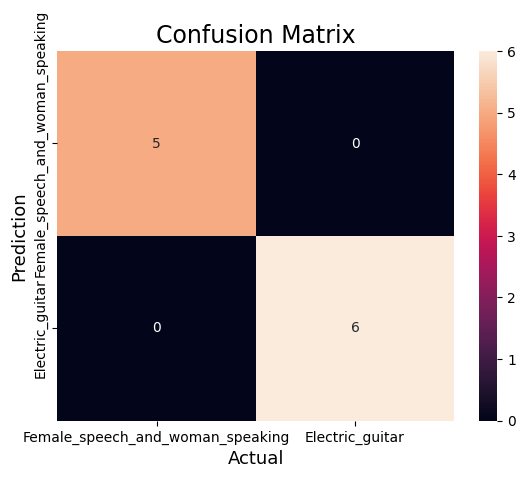

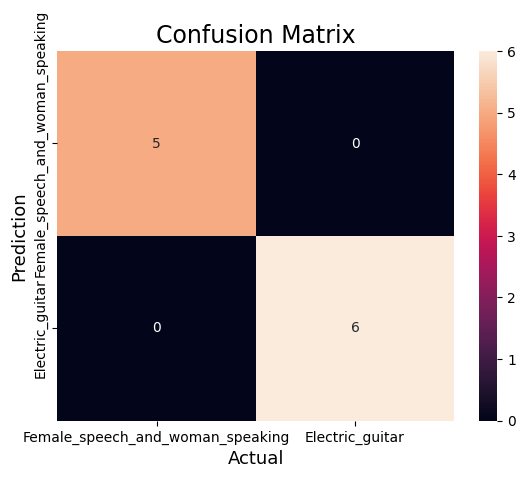

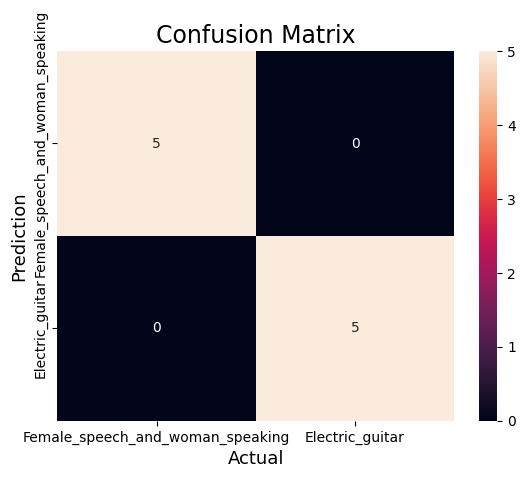

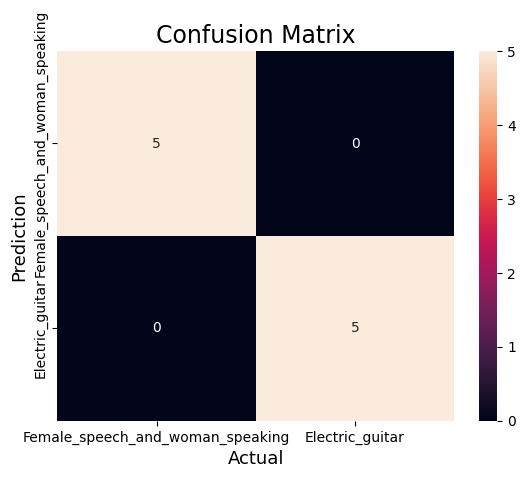

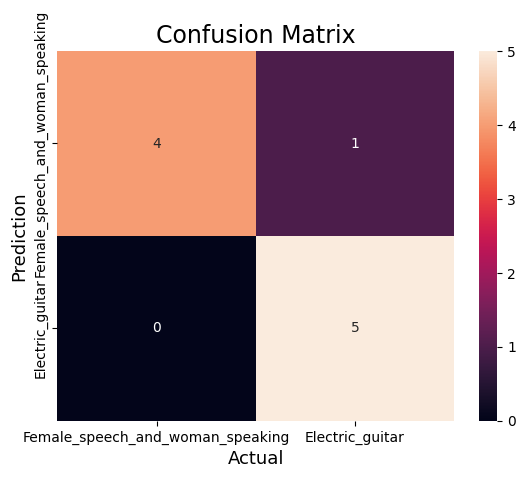

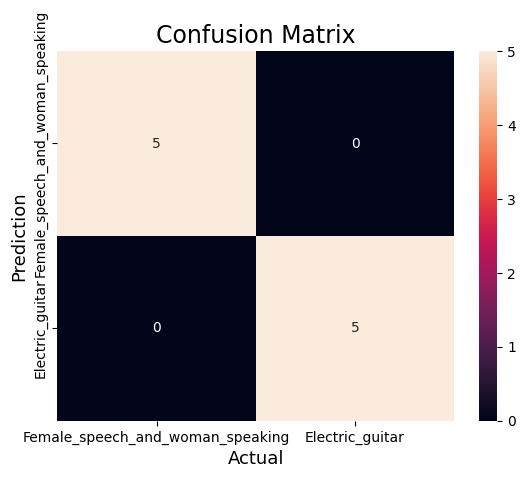

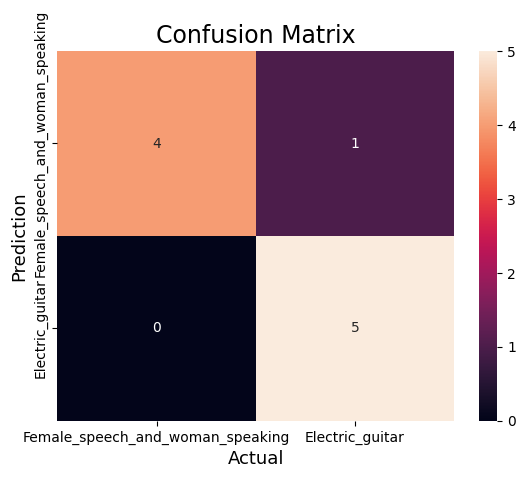

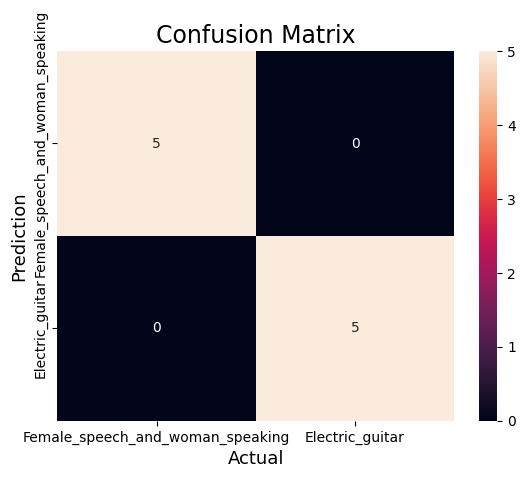

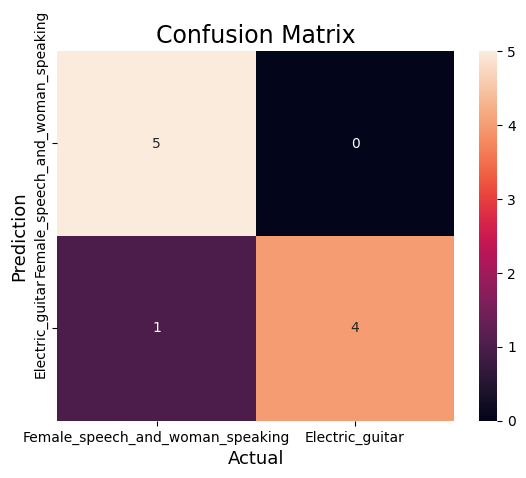

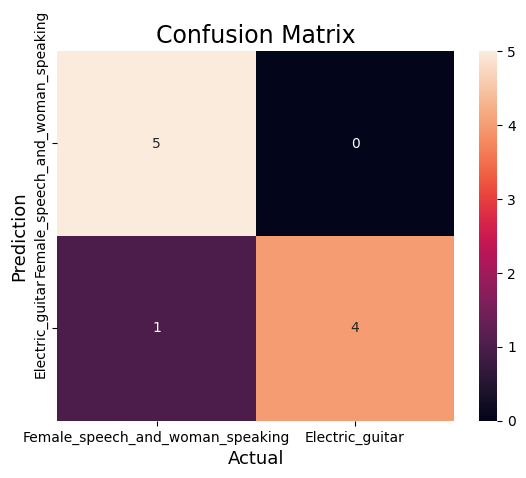

Accuracy: [1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 0.9, 1.0, 0.9, 0.9]
Precision: [1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 1.0, 0.8333333333333334, 1.0, 1.0, 1.0]
Recall: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8]
Sensitivity: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8]
Specificity: [1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 0.8, 1.0, 1.0, 1.0]
Average accuracy: 0.96
Average precision: 0.9666666666666668
Average recall: 0.9600000000000002
Average sensitivity: 0.9600000000000002
Average specificity: 0.96


In [ ]:
X = fm.iloc[:, 1:20].values
y = fm.iloc[:,21].values


clf = svm.SVC(kernel='linear')

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

accu_list = []

recall_list = []

precision_list = []

specificity_list = []

sensitivity_list = []

for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  accu_list.append(metrics.accuracy_score(y_test, y_pred))
  precision_list.append(metrics.precision_score(y_test, y_pred))
  recall_list.append(metrics.recall_score(y_test, y_pred))
  specificity_list.append(specificity_score(y_test, y_pred))
  sensitivity_list.append(sensitivity_score(y_test, y_pred))

  result = confusion_matrix(y_test, y_pred)
  sns.heatmap(result,
              annot = True,
              fmt = 'g',
              xticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar'],
              yticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar']
              )
  plt.ylabel('Prediction', fontsize=13)
  plt.xlabel('Actual', fontsize=13)
  plt.title('Confusion Matrix', fontsize = 17)
  plt.show()

avg_accuracy = np.average(accu_list)
avg_precision = np.average(precision_list)
avg_recall = np.average(recall_list)
avg_sensitivity = np.average(sensitivity_list)
avg_specificity = np.average(specificity_list)

print("Accuracy:",accu_list)

print("Precision:",precision_list)

print("Recall:",recall_list)

print("Sensitivity:",sensitivity_list)

print("Specificity:",specificity_list)

print("Average accuracy:",avg_accuracy)

print("Average precision:",avg_precision)

print("Average recall:",avg_recall)

print("Average sensitivity:",avg_sensitivity)

print("Average specificity:",avg_specificity)




SVM rbf kernel

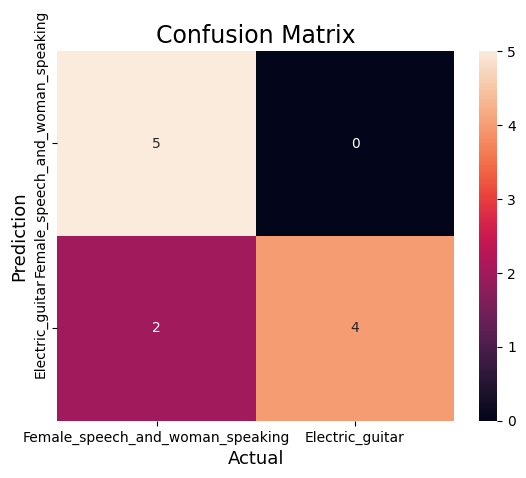

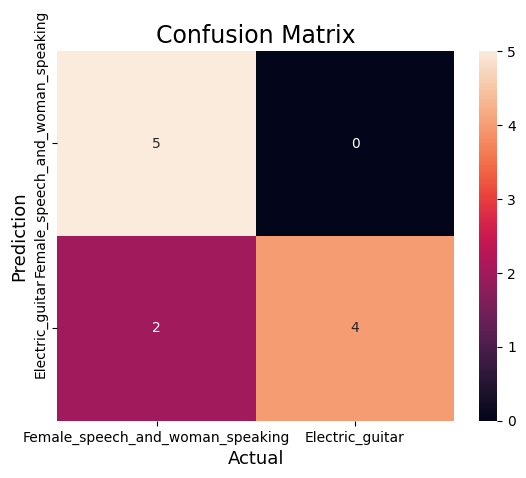

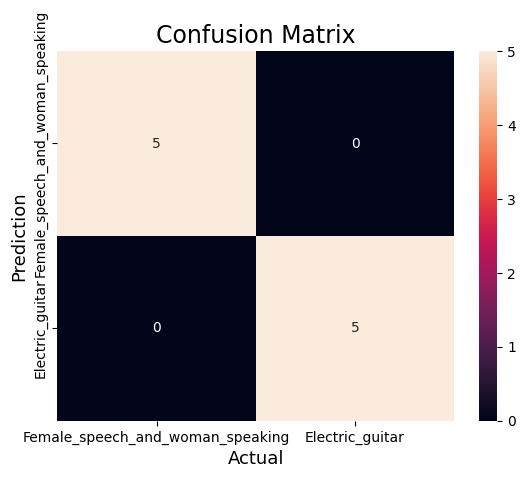

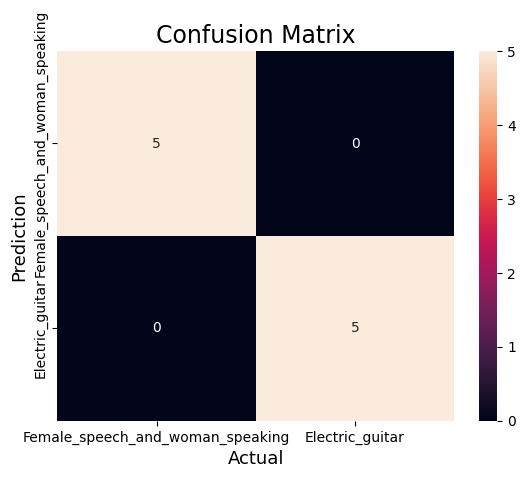

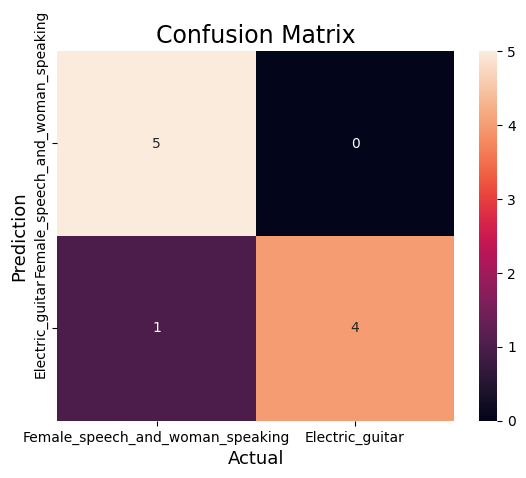

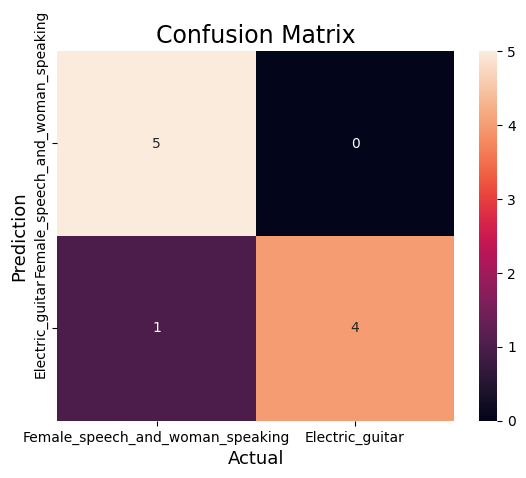

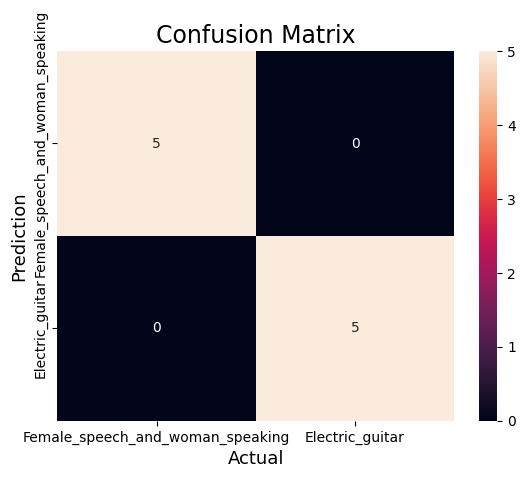

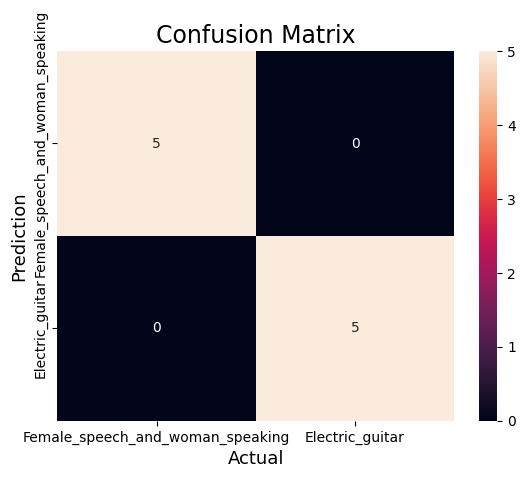

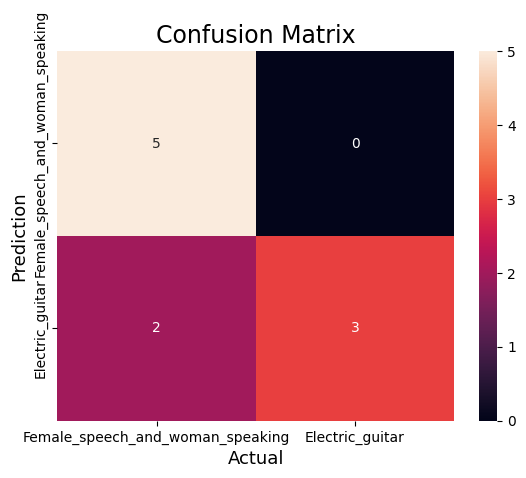

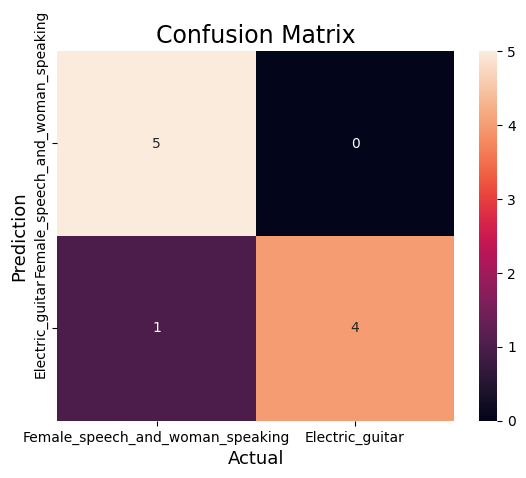

Accuracy: [0.8181818181818182, 0.8181818181818182, 1.0, 1.0, 0.9, 0.9, 1.0, 1.0, 0.8, 0.9]
Precision: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Recall: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Sensitivity: [0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 0.8, 0.8, 1.0, 1.0, 0.6, 0.8]
Specificity: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 0.9136363636363637
Average precision: 1.0
Average recall: 1.0
Average sensitivity: 0.8333333333333334
Average specificity: 1.0


In [ ]:
clf = svm.SVC(kernel='rbf', gamma=0.1)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

acc_list = []

precision_list = []

recall_list = []

specificity_list = []

sensitivity_list = []

for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  acc_list.append(metrics.accuracy_score(y_test, y_pred))
  precision_list.append(metrics.precision_score(y_test, y_pred))
  recall_list.append(metrics.precision_score(y_test, y_pred))
  sensitivity_list.append(sensitivity_score(y_test, y_pred))
  specificity_list.append(specificity_score(y_test, y_pred))

  result = confusion_matrix(y_test, y_pred)
  sns.heatmap(result,
              annot = True,
              fmt = 'g',
              xticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar'],
              yticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar']
              )
  plt.ylabel('Prediction', fontsize=13)
  plt.xlabel('Actual', fontsize=13)
  plt.title('Confusion Matrix', fontsize = 17)
  plt.show()

avg_accuracy = np.average(acc_list)
avg_precision = np.average(precision_list)
avg_recall = np.average(recall_list)
avg_sensitivity = np.average(sensitivity_list)
avg_specificity = np.average(specificity_list)

print("Accuracy:",acc_list)

print("Precision:",precision_list)

print("Recall:",recall_list)

print("Sensitivity:",sensitivity_list)

print("Specificity:",specificity_list)

print("Average accuracy:",avg_accuracy)

print("Average precision:",avg_precision)

print("Average recall:",avg_recall)

print("Average sensitivity:",avg_sensitivity)

print("Average specificity:",avg_specificity)

Decission tree (criterion = 'entropy')


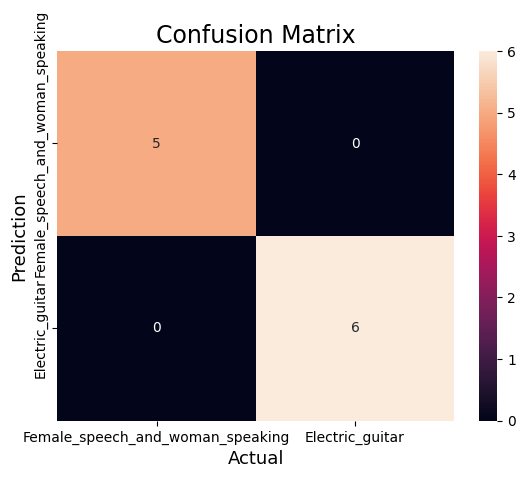

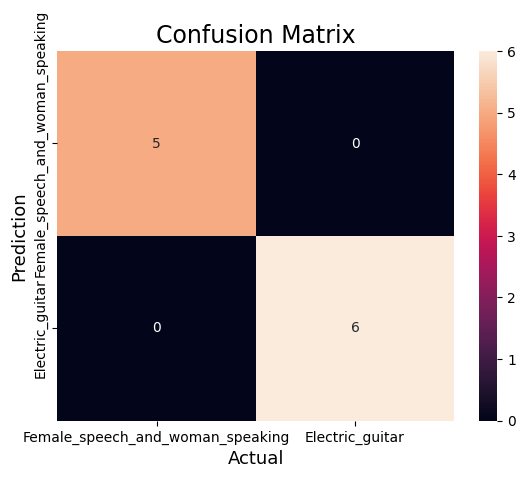

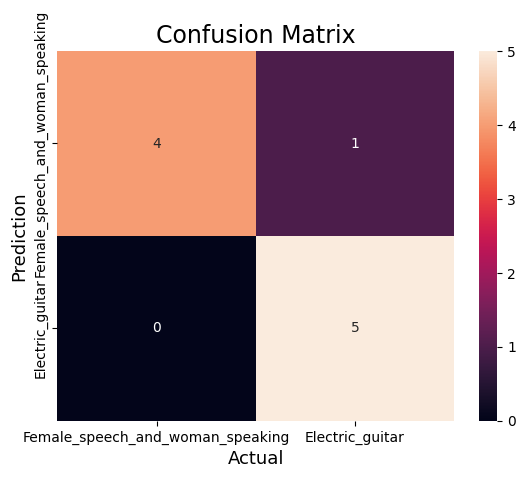

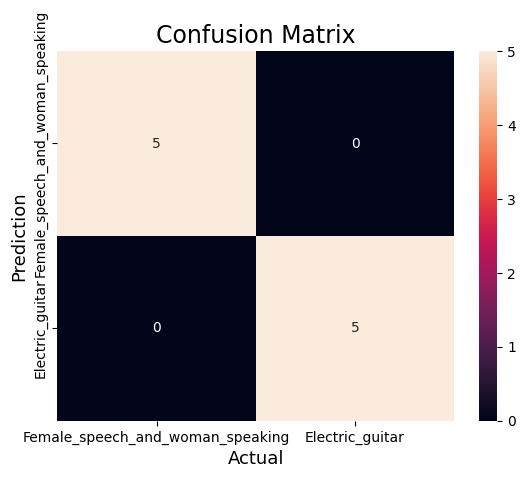

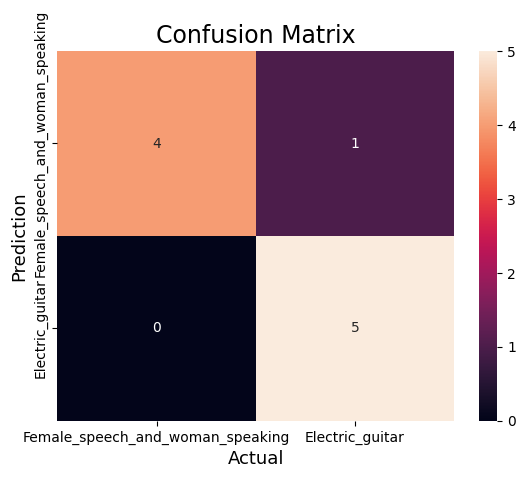

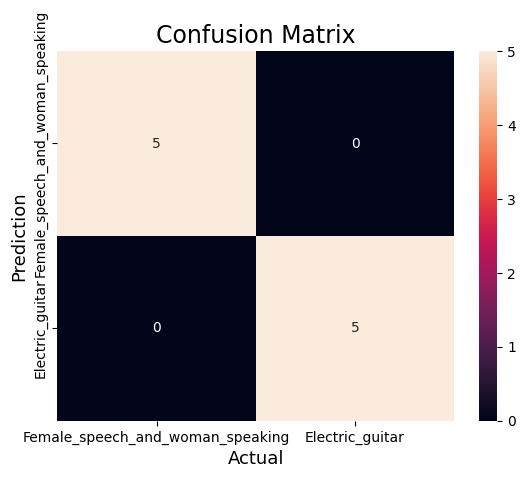

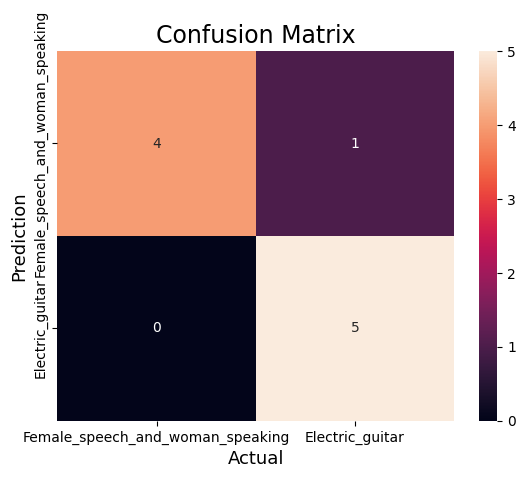

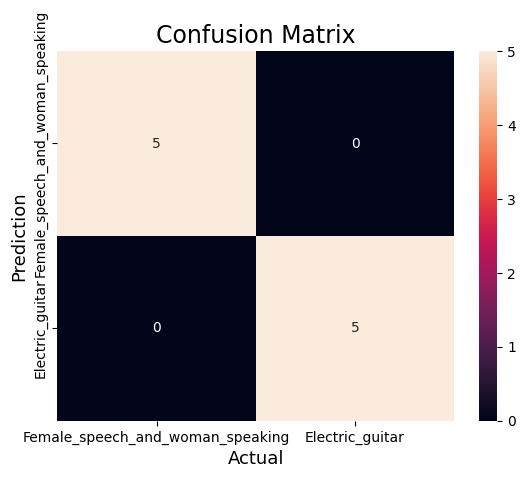

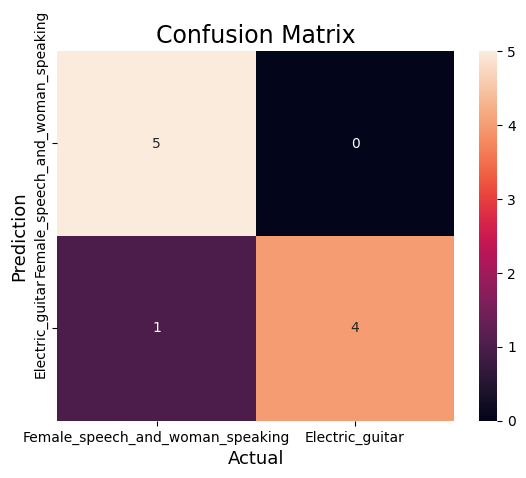

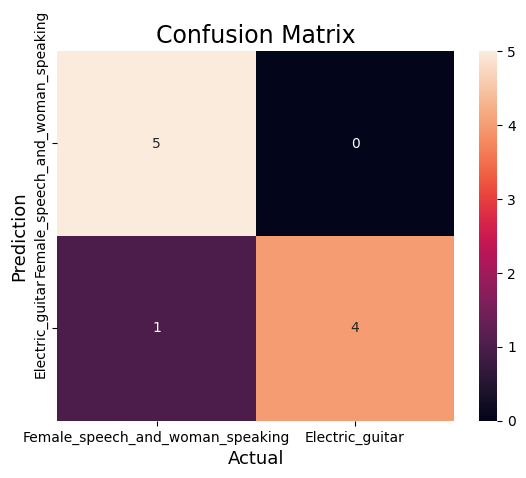

Accuracy: [1.0, 1.0, 0.9, 1.0, 0.9, 1.0, 0.9, 1.0, 0.9, 0.9]
Precision: [1.0, 1.0, 0.8333333333333334, 1.0, 0.8333333333333334, 1.0, 0.8333333333333334, 1.0, 1.0, 1.0]
Recall: [1.0, 1.0, 0.8333333333333334, 1.0, 0.8333333333333334, 1.0, 0.8333333333333334, 1.0, 1.0, 1.0]
Sensitivity: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8]
Specificity: [1.0, 1.0, 0.8, 1.0, 0.8, 1.0, 0.8, 1.0, 1.0, 1.0]
Average accuracy: 0.95
Average precision: 0.95
Average recall: 0.95
Average sensitivity: 0.9600000000000002
Average specificity: 0.9400000000000001


In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

acc_list = []

precision_list = []

recall_list = []

specificity_list = []

sensitivity_list = []

for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  acc_list.append(metrics.accuracy_score(y_test, y_pred))
  precision_list.append(metrics.precision_score(y_test, y_pred))
  recall_list.append(metrics.precision_score(y_test, y_pred))
  sensitivity_list.append(sensitivity_score(y_test, y_pred))
  specificity_list.append(specificity_score(y_test, y_pred))

  result = confusion_matrix(y_test, y_pred)
  sns.heatmap(result,
              annot = True,
              fmt = 'g',
              xticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar'],
              yticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar']
              )
  plt.ylabel('Prediction', fontsize=13)
  plt.xlabel('Actual', fontsize=13)
  plt.title('Confusion Matrix', fontsize = 17)
  plt.show()

avg_accuracy = np.average(acc_list)
avg_precision = np.average(precision_list)
avg_recall = np.average(recall_list)
avg_sensitivity = np.average(sensitivity_list)
avg_specificity = np.average(specificity_list)

print("Accuracy:",acc_list)

print("Precision:",precision_list)

print("Recall:",recall_list)

print("Sensitivity:",sensitivity_list)

print("Specificity:",specificity_list)

print("Average accuracy:",avg_accuracy)

print("Average precision:",avg_precision)

print("Average recall:",avg_recall)

print("Average sensitivity:",avg_sensitivity)

print("Average specificity:",avg_specificity)

KNN  classifier

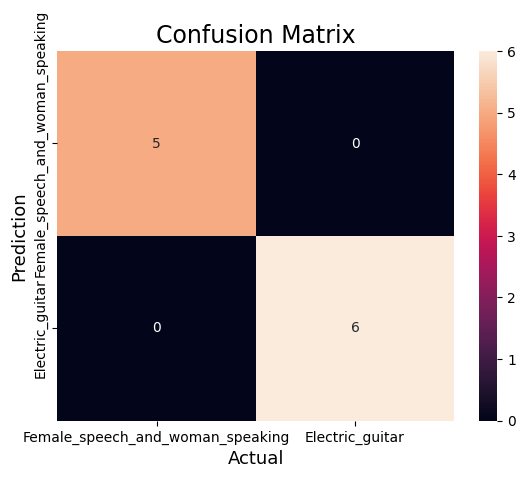

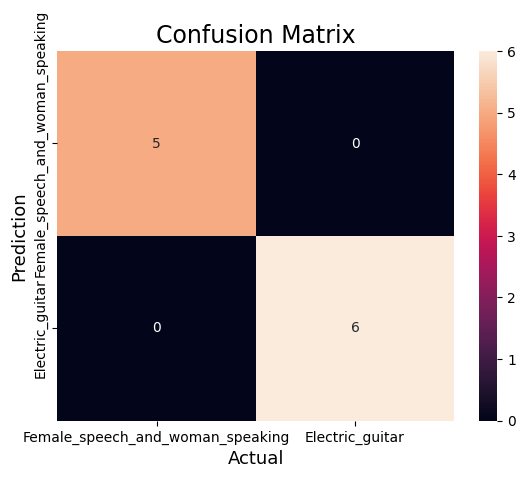

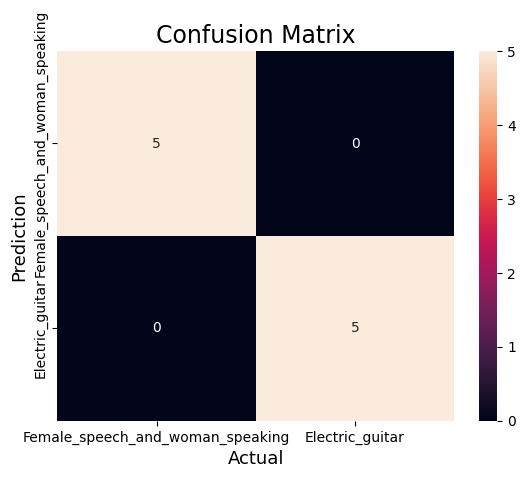

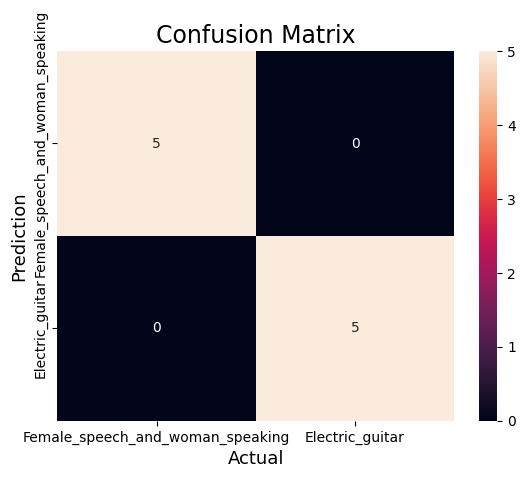

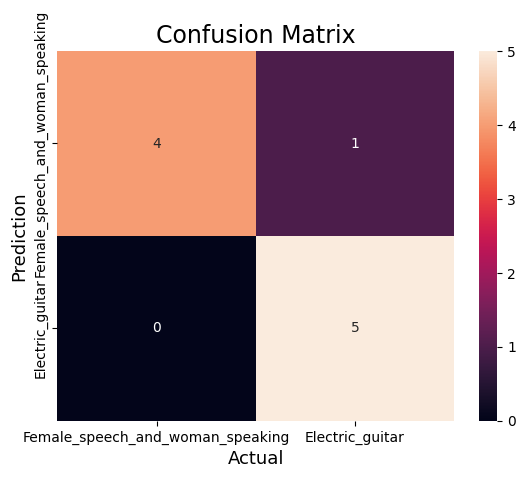

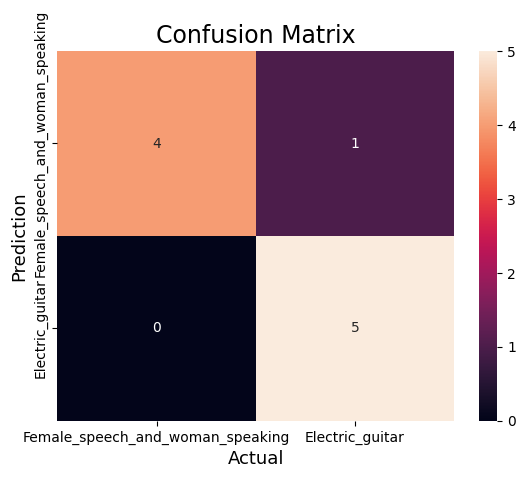

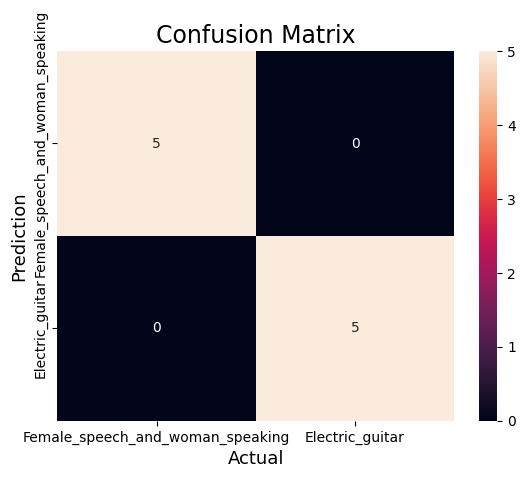

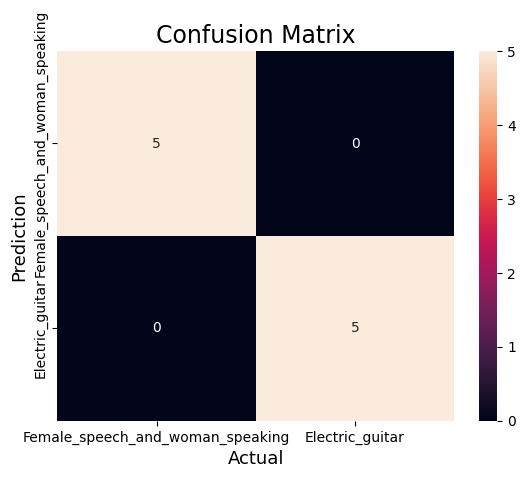

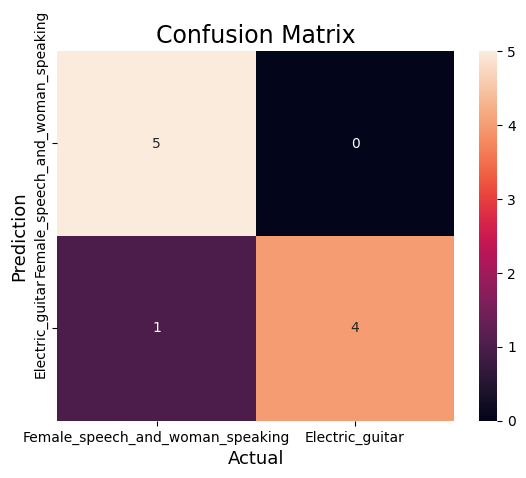

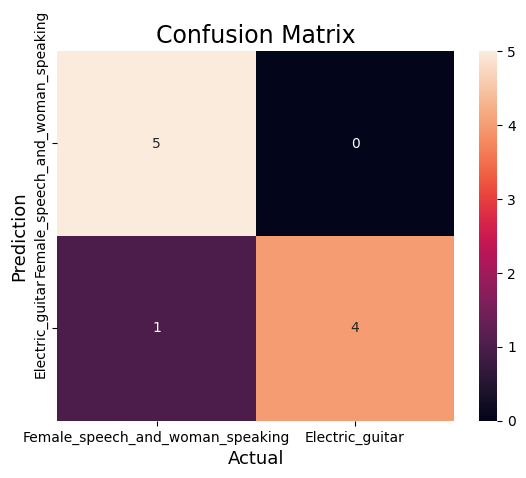

Accuracy: [1.0, 1.0, 1.0, 1.0, 0.9, 0.9, 1.0, 1.0, 0.9, 0.9]
Precision: [1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0]
Recall: [1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0]
Sensitivity: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8]
Specificity: [1.0, 1.0, 1.0, 1.0, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0]
Average accuracy: 0.96
Average precision: 0.9666666666666668
Average recall: 0.9666666666666668
Average sensitivity: 0.9600000000000002
Average specificity: 0.96


In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

acc_list = []

precision_list = []

recall_list = []

specificity_list = []

sensitivity_list = []

for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  acc_list.append(metrics.accuracy_score(y_test, y_pred))
  precision_list.append(metrics.precision_score(y_test, y_pred))
  recall_list.append(metrics.precision_score(y_test, y_pred))
  sensitivity_list.append(sensitivity_score(y_test, y_pred))
  specificity_list.append(specificity_score(y_test, y_pred))

  result = confusion_matrix(y_test, y_pred)
  sns.heatmap(result,
              annot = True,
              fmt = 'g',
              xticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar'],
              yticklabels = ['Female_speech_and_woman_speaking', 'Electric_guitar']
              )
  plt.ylabel('Prediction', fontsize=13)
  plt.xlabel('Actual', fontsize=13)
  plt.title('Confusion Matrix', fontsize = 17)
  plt.show()

avg_accuracy = np.average(acc_list)
avg_precision = np.average(precision_list)
avg_recall = np.average(recall_list)
avg_sensitivity = np.average(sensitivity_list)
avg_specificity = np.average(specificity_list)

print("Accuracy:",acc_list)

print("Precision:",precision_list)

print("Recall:",recall_list)

print("Sensitivity:",sensitivity_list)

print("Specificity:",specificity_list)

print("Average accuracy:",avg_accuracy)

print("Average precision:",avg_precision)

print("Average recall:",avg_recall)

print("Average sensitivity:",avg_sensitivity)

print("Average specificity:",avg_specificity)

In [ ]:
#  "83a9905e" "455e896e" "efcb8eb5" "7061c153"
#  "d018a630" "d10b299f" "4928222b" "d57316bd"
#  "22c82663" "6f1c7916" "9459e602" "5f4d6a90"
#  "2f77fa88" "5d9f70e4" "dddaad6e" "89c51b82"
#  "adff8113" "c548732f" "c10dd7a0" "206dce4c"
#  "c573bbb6" "dc576e0e" "bc749857" "91d8844d"
#  "6862be13" "2ce15a90" "e0735d4d" "421e57fa"
#  "dda16103" "78d8d2c8" "7eb4d9f0" "3906380b"
#  "da51f043" "e098753b" "11e6a84b" "2c28c5e6"
#  "fdc70402" "e661384c" "dd498f00" "962f8f24"
#  "791abba4" "448b56e8" "5f75d282" "4e39f39e"
#  "6e8e78b8" "82a97540" "7aafae75" "c1ffa1ef"
#  "df3799c1" "2d52fd96" "06cceadb" "b619fcc2"
#  "32c6b83e" "06f30dec" "fbd23a68" "6dbe8bc9"
#  "9feb0edb" "9b10744d" "551f1d29" "f60dcbb2"
#  "931f845d" "ee6cc37e" "7ceded52" "25b45b4b"
#  "8ed29f42" "24a0b0d0" "cbe4b772" "dc2037d6"
#  "1cd178fa" "9d219390" "59c1c3f6" "c5d2ea6d"
#  "e87d7697" "de8542e1" "e68bd08f" "17aafc70"
#  "dfd87955" "f098f1a2" "277091a6" "2a0260fd"
#  "8dc2c5b9" "8c9f85d5" "bf2c5be4" "079bf888"
#  "7cbb1eb8" "e56cc0f1" "a4caf379" "c91fb9ec"
#  "f9d8542c" "e914eae7" "ee1b0975" "1a959921"
#  "fc24aefe" "6b255fb3" "c13b6f07" "9cd74846"
#  "65937aef" "a3d359f2" "b5040cc2" "2fb7b4d4"
#  "45a8ea88" "861daaac"